In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Notes
### 标量值函数（scalar-valued function）
它接受一个或多个变量作为输入，但只输出一个单一的标量值（scalar value）。这里的“标量”通常是指一个普通的实数或复数，而与之相对的“向量值函数”则输出的是一个向量或矩阵。
### 举例
- $f(x) = 3x^2 - 4x + 5$
- $f(x, y) = x^2 + y^2$
- $f(x, y, z) = x^2 + y^2 + z^2$
上述案例中，$f$ 是一个标量值函数，它接受一个或多个输入变量，并输出一个标量值。
### 标量值函数在神经网络中的作用
在神经网络中，我们通常会使用标量值函数来衡量模型的性能。这些函数通常被称为“损失函数”（loss functions）或“目标函数”（objective functions）。我们的目标是最小化这些函数的值，以便训练出一个性能更好的模型。

In [24]:
def f(x):
    return 3*x**2 - 4*x + 5
# f(x) 为抛物线方程（Parabola）

In [25]:
f(3.0)

20.0

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


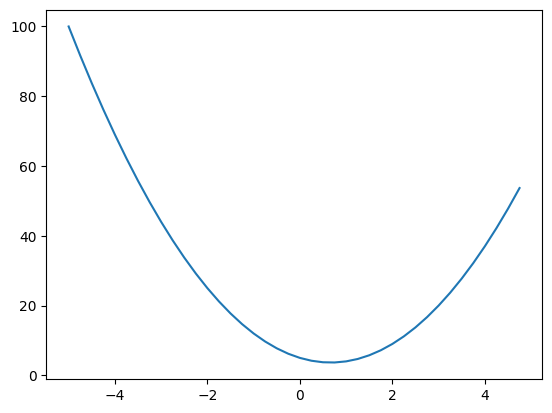

In [26]:
# np.arange 的作用是生成一个等差数列
# 我们从 -5 到 5 之间生成了一组 x 值，间隔为 0.25
xs = np.arange(-5, 5, 0.25)
print(xs)
# xs 作为 np array 是可以被 call 的，我们将这些 x 值传入 f(x) 函数，得到对应的 y 值
ys = f(xs)
print(ys)
# 用 matplotlib 绘制出这些点
plt.plot(xs, ys)

思考题：这个方程任何 x 值，对应的导数是多少？
备注：
1. 训练神经网络的真实世界中，大家不会真的用手去计算神经网络的导数，因为会有成千上百个参数。
2. 我们需要**理解什么是 derivative**，以及它传递的信息。

根据维基百科定义：
$$
L = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h}
$$
这个定义是说，当我们把 $h$ 逼近 0 时，$f(a + h)$ 和 $f(a)$ 之间的差异，除以 $h$，就是导数。它传递的信息是，当我们增加一个很小的 $h$ 时，$f$ 的变化量是多少、这个时候的斜率是多少。

In [27]:
h = 0.001
x = 3.0
f(x + h) - f(x)

0.01400300000000243

1. f(x + h) 传递的是正负响应（positive or negative）：
    1. 当 f(x + h) > f(x) 时，导数是正的
    2. 当 f(x + h) < f(x) 时，导数是负的
2. f(x + h) - f(x) 传递的是函数在 x 附近的变化量（change）
    1. 正值：如果 f(x + h) - f(x) 是正值，那么函数在 x 附近是上升的
    2. 负值：如果 f(x + h) - f(x) 是负值，那么函数在 x 附近是下降的

In [28]:
h = 0.00000001
x = 3.0
(f(x + h) - f(x)) / h

14.00000009255109

In [29]:
h = 0.00000001
x = -3.0
(f(x + h) - f(x)) / h

-22.00000039920269

In [30]:
h = 0.0000001
x = 2/3
(f(x + h) - f(x)) / h

2.9753977059954195e-07

In [31]:
# more complex case
a = 2.0
b = -3.0
c = 10
d = a*b + c
print(d)

4.0


In [32]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [33]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [34]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [35]:
# 开始构建神经网络

In [254]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other): # other + self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        
        for node in reversed(topo):
            node._backward()
        
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [226]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0)

In [37]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [38]:
d._op

'+'

## 对 Value 类的理解
这段代码定义了一个简单的“计算图”（Computation Graph）数据结构 Value，用于存储数值及其运算关系（即操作历史）。在神经网络中，这种结构通常用来追踪变量之间的依赖关系，特别是反向传播过程中追踪的计算路径。
### Value 类的定义
- `data`：存储当前节点的数值。它可以是一个浮点数或整数，表示该节点的值。
- `_prev`：这是一个元组（Tuple），表示当前节点的“父节点”，即从哪些节点运算而来。这个属性让我们可以追溯到该节点的“前驱”节点。这种追溯关系对于反向传播（backpropagation）特别有用，可以帮助构建计算图。
- `_op`：记录当前节点的操作类型，用来指示节点是通过哪种操作生成的。可以是 +（加法）、*（乘法）等操作符。这有助于在构建计算图时理解节点间的运算关系。
例如，当我们有 `d = a * b + c` 这样的计算时，`d` 会追踪到自己是通过 `+` 运算得到的，同时存储了子节点 `a * b` 和 `c`。

### Value 类的操作符重载
- `__add__`：重载了加法操作符 `+`，用于实现节点之间的加法运算。它返回一个新的 Value 对象，表示两个节点的和。
- `__mul__`：重载了乘法操作符 `*`，用于实现节点之间的乘法运算。它返回一个新的 Value 对象，表示两个节点的积。

## 创建实例并运算
```python
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
```
解释每一步：
1. `a = Value(2.0)` 和 `b = Value(-3.0)`：创建两个 `Value` 实例，`a` 和 `b`，分别存储数据 `2.0` 和 `-3.0`。
2. `c = Value(10.0)`：创建一个 `Value` 实例，`c`，存储数据 `10.0`。
3. `d = a * b + c`：
    * `a * b`：首先计算 `a` 和 `b` 的乘积，创建一个新 `Value` 实例，该实例的 `data` 为 `-6.0`（即 `2.0 * -3.0`），`_op` 为 `'*'`，并且 `_children` 包含 `a` 和 `b`。
    * `a * b + c`：然后计算乘积和 `c` 的和，再次创建一个新 `Value` 实例，这个实例的 `data` 为 `4.0`（即 `-6.0 + 10.0`），`_op` 为 `'+'`，并且 `_children` 包含了 `a * b` 和 `c`。
最后得到的 `d` 实例代表了整个计算 `a * b + c` 的结果。它不仅存储了数值 4.0，还保留了计算的历史（即追溯前驱节点及其操作），这在反向传播过程中能够帮助我们逐步计算出每个节点的导数。




In [52]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

L = d * f

dL/dd = ? f

(f(x+h)-f(x))/h

为 d 增加 h 后

((d+h)*f - d*f)/h
(d*f + h*f - d*f)/h
(h*f)/h
f

同样的，dL/df = d


此步骤为最重要和需要理解的一步
目标：dL / dc

我们理解 dL 如何 sensitive to dd，那它又如何 sensitive to dc 呢，c 是如何通过 d 影响到 L 的呢？

c 可以影响 d，d 可以影响 L ，所以我们可以推出他们之间存在关系

我们可以先关注 dd / dc = ? 

dd / dc = 1.0
d = c + e

(f(x+h)-f(x))/h

((c+h + e) - (c + e)) / h
(c + h + e - c - e) / h
h / h
1.0

=> 

dd / dc = 1.0

dd / de = 1.0

这个阶段是 local derivative

如何再知道 dL / dc 或者 dL / de 呢？答案是 **chain rule**

WANT：dL / dc

KNOW: 
dL / dd
dd / dc

dL / dc = (dL / dd) * (dd / dc)



## Chain Rule
摘录自 wikipedia：
> The chain rule may also be expressed in Leibniz's notation. If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y. In this case, the chain rule is expressed as
> $$ \frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx} $$


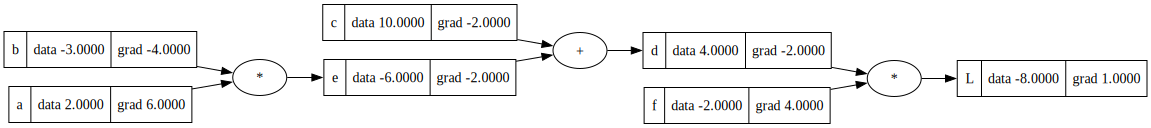

In [69]:
draw_dot(L)

我们将从最后一个节点 L 开始，逐步向前计算每个节点的导数。这个过程通常称为“反向传播”（backpropagation）。我们刚开始会手动计算所有的 gradient 来熟悉过程。

- [ ] 理解 backpropagation 的过程以及为何它对于神经网络十分重要。

In [64]:
f.grad = 4.0
d.grad = -2.0

c.grad = -2.0
e.grad = -2.0

In [68]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

再次做 chain rule

dL / de = -2.0

e = a * b
de / da = b

dL / da = (dL / de) * (de / da)


In [70]:
# 我们如何调整我们的 inputs 让 L 的值变大
# 方案：我们只需要朝着 gradiant 的方向调整数值

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)


-7.286496


In [137]:
def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1)/h)


lol()
    

0.0


我们接下去要 backpropagate 一个 neuron

https://cs231n.github.io/neural-networks-1/

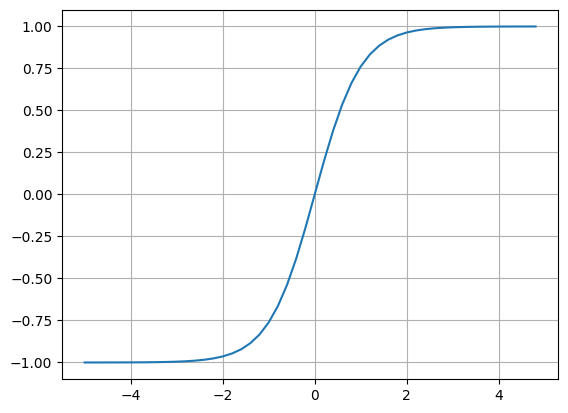

In [71]:
# squashing function
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

In [227]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

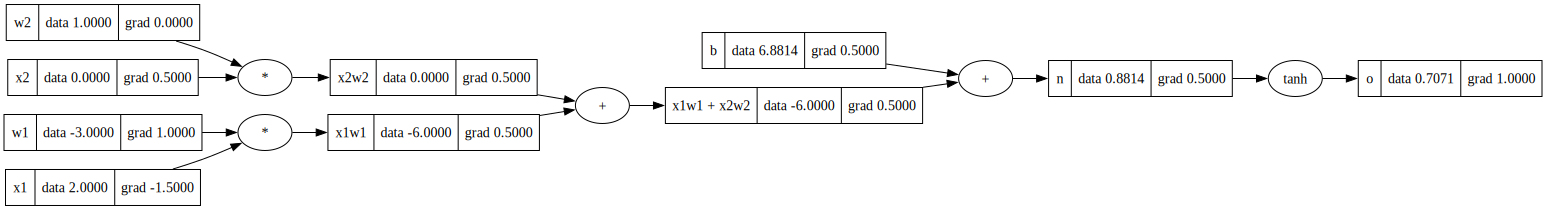

In [228]:
draw_dot(o)

Q：如何自动地运行 backpropagation 而不用手动调用 backword 函数？
A：Topological sort

In [209]:
o.backward()

In [204]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

In [202]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [194]:
o.grad = 1.0

In [195]:
o._backward()

In [196]:
n._backward()

In [197]:
b._backward()

In [198]:
x1w1x2w2._backward()

In [200]:
x2w2._backward()
x1w1._backward()


In [95]:
# 参考前面的逻辑
# do/dx2 = (do/dx2w2) * (dx2w2/dx2) = x2w2.grad * w2.data

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [93]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [91]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [88]:
n.grad = 0.5

In [85]:
o.grad = 1.0

In [87]:
# o = tanh(n)
# https://en.wikipedia.org/wiki/Hyperbolic_functions#Derivatives
# do/dn = 1 - tanh(n)**2 => 1 - o**2

1 - o.data**2

0.4999999999999999

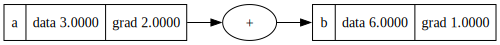

In [213]:
# 现阶段存在一个 bug
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)
# 因为我们做 a+a ，这时候 self 和 other 都是 a
# self.grad = other.data * out.grad
# other.grad = self.data * out.grad
# self 设置好后，other 会覆盖
# 解决方案是：https://en.wikipedia.org/wiki/Chain_rule#Multivariable_case 我们要累加这些 gradiant

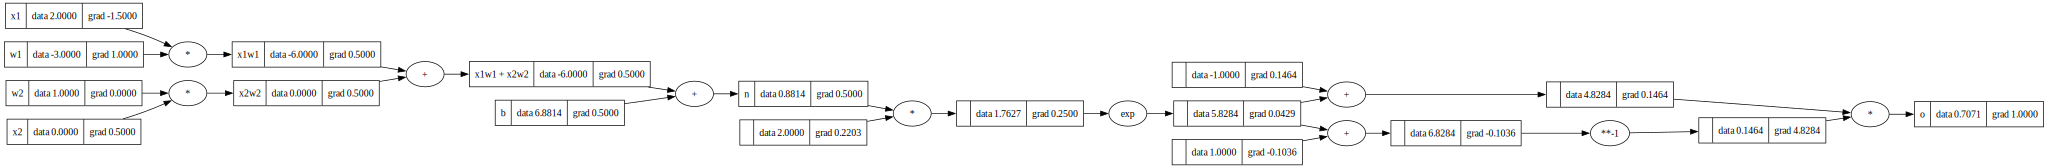

In [234]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---- using a different way to implement tanh
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

1. 我们实现 operations 的复合程度取决于我们自己的选择
2. 核心是：我们有一些输入，输出是这些输入的函数结果，只要我们能够做 forward pass，针对这个操作的 backward pass，我们不用在意这个操作是什么以及它的复合程度。只要你能够写 local gradients，你就能 chain the gradients 然后继续做 backpropagation。

# Pytorch version

In [241]:
import torch

In [243]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad =True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad =True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad =True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad =True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad =True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [244]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [271]:

import random


class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    def __call__(self, x):
        # w * x + b
        # do forward pass
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    def __init__(self, ninput, noutput):
        self.neurons = [Neuron(ninput) for _ in range(noutput)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    
x = [2.0, 3.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.7408006166870571)

In [272]:
n.parameters()

[Value(data=-0.11020735193905384),
 Value(data=0.7119159007391045),
 Value(data=0.1463919815148813),
 Value(data=-0.6052434442111831),
 Value(data=0.3601197961851057),
 Value(data=0.9075054003359337),
 Value(data=0.6434630036526445),
 Value(data=0.8049057676632616),
 Value(data=-0.7530267353781475),
 Value(data=0.40661875873171693),
 Value(data=0.20832130727882814),
 Value(data=-0.2470396204272518),
 Value(data=0.9805225015205195),
 Value(data=0.901250903927292),
 Value(data=-0.2911263190317599),
 Value(data=0.8702442494010494),
 Value(data=-0.46041304552709583),
 Value(data=-0.24210641465182636),
 Value(data=-0.5685319924633243),
 Value(data=0.3336712273851039),
 Value(data=0.14452065018136384),
 Value(data=-0.2970078624622219),
 Value(data=-0.2953107175529348),
 Value(data=-0.5146055369066518),
 Value(data=-0.9101191105162059),
 Value(data=0.4077295785738493),
 Value(data=-0.5858038559035392),
 Value(data=-0.13467270215732063),
 Value(data=-0.9012510548614887),
 Value(data=0.22361528

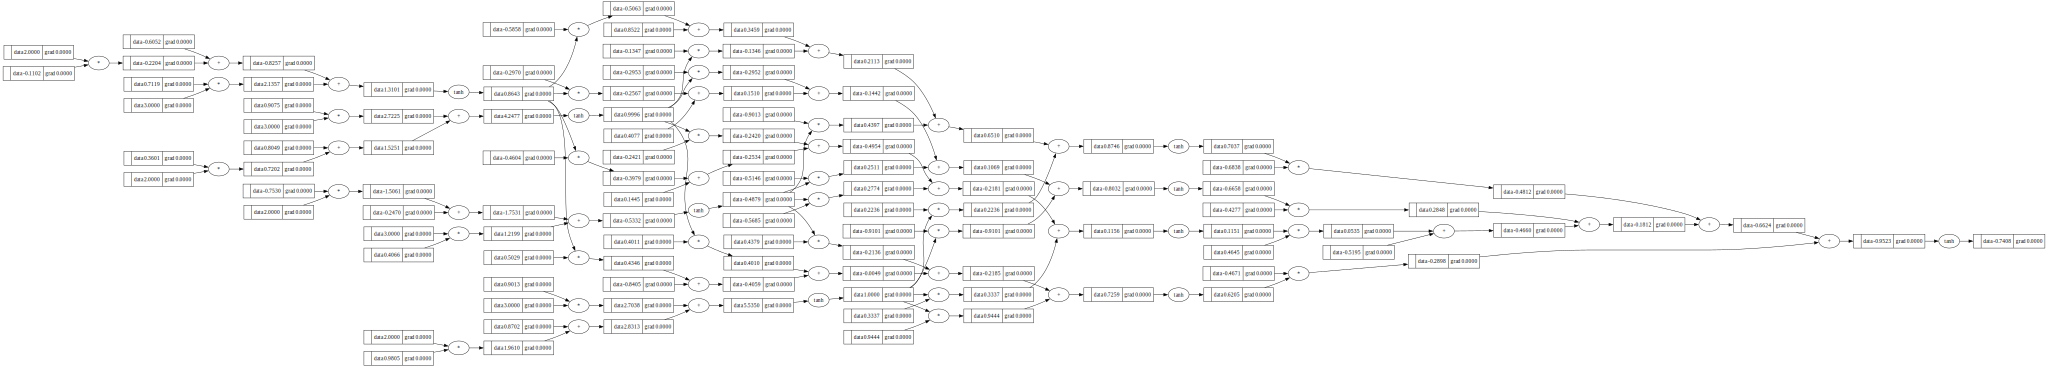

In [273]:
draw_dot(n(x))

In [274]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.7400243605591571),
 Value(data=-0.5463851982201958),
 Value(data=-0.700544930134503),
 Value(data=-0.6411222216165744)]

当前结果是：
```
[Value(data=0.9132943903404861),
 Value(data=0.8545651836397877),
 Value(data=0.40981418942343295),
 Value(data=0.9144174526854795)]
```

我们的预期是：`[1.0, -1.0, -1.0, 1.0]`

这要求我们第一个 Value 的 data 要提升、第二个 Value 的 data 要降低、第三个 Value 的 data 要降低、第四个 Value 的 data 要提升。

问题：我们要如何调整神经网络的 weights，让其能够更好地预测结果？
答：计算一个 single number 能够衡量整个神经网络的表现，我们称其为 loss。

In [275]:
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]

[Value(data=3.027684775339304),
 Value(data=0.20576638839373104),
 Value(data=0.08967333886814967),
 Value(data=2.6932821462837206)]

如果和预测值接近，`(yout - ygt)**2` 的值会很小，反之则很大，只有在和预测值一样的时候才会变 0

In [276]:
loss = sum([(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=6.016406648884906)

In [277]:
loss.backward()

In [278]:
n.layers[0].neurons[0].w[0].grad

0.45752008415470025

我们能够看到这个特定 layer 的特定 neuron 的特定 weight 的 gradient 是多少，当前的值是负数，它对 loss 的影响也是负的，所以若要减小 loss，我们需要增加这个 weight。

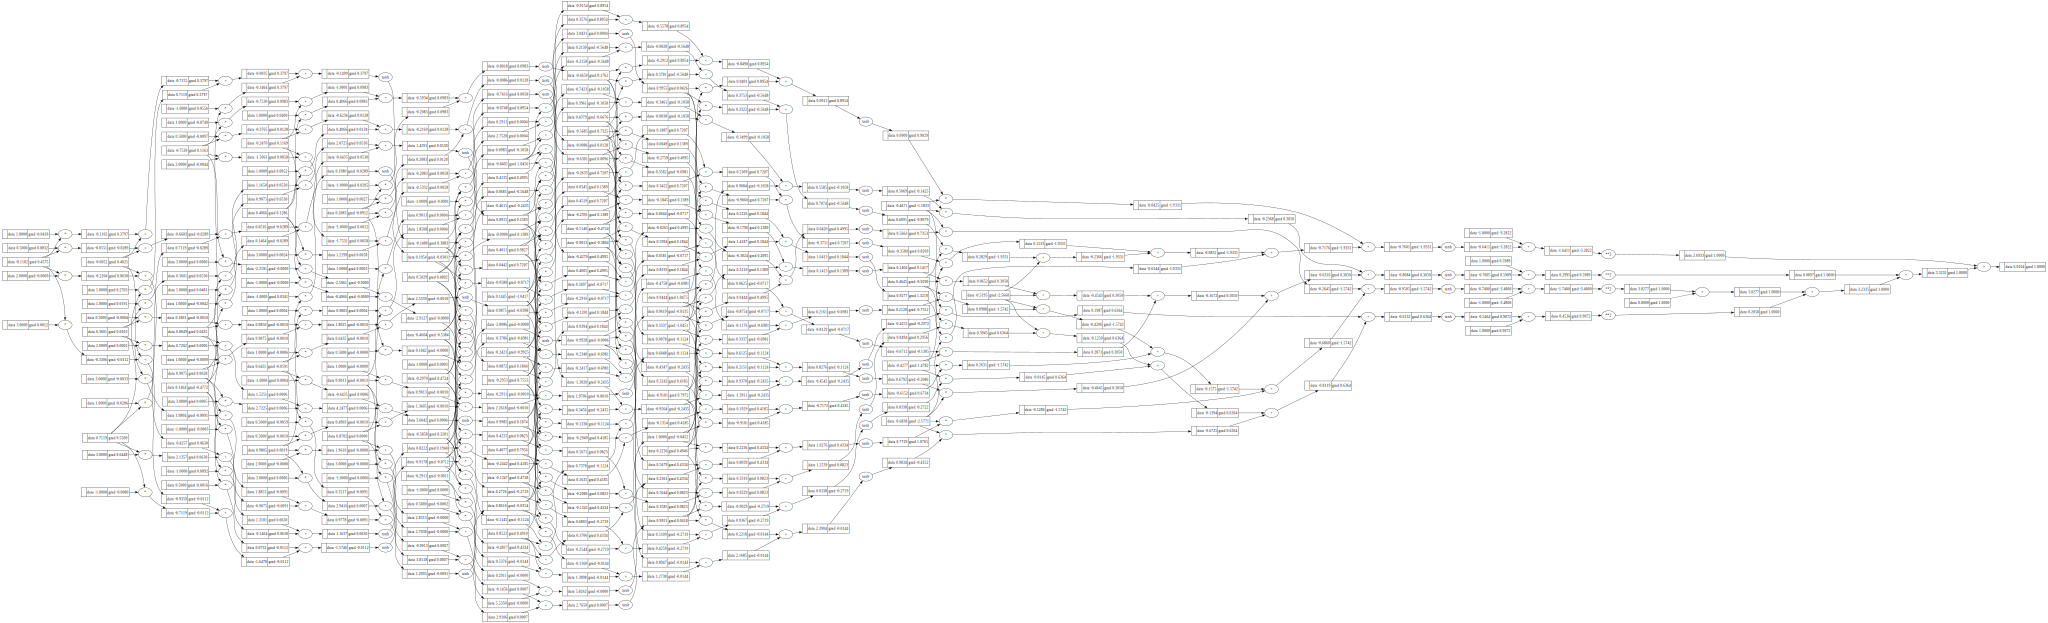

In [279]:
draw_dot(loss)

In [280]:
n.layers[0].neurons[0].w[0].data

-0.11020735193905384

In [ ]:
for p in n.parameters():
    # In gradient descent, we are thinking of the gradient as a vector pointing the direction of increased loss
    p.data += -0.01 * p.grad

## 代办疑问
- [ ] 为何我们要用 -0.01
- [ ] 为何 Karpathy 在举例的时候只拿 `n.layers[0].neurons[0].w[0].data` 举例会将其这个节点的 loss 然后推论出 `p.data += -0.01 * p.grad` 会降低整个 loss 的吗，其他的节点不是也会影响 loss 吗，如果它们是需要 `p.data += 0.01 * p.grad` 呢？